<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Intermediate_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intermediate SQL

This intermediate-level course will teach you several key functions necessary to wrangle, filter, and categorize information in a relational database, expand your SQL toolkit, and answer complex questions. You will learn the robust use of CASE statements, subqueries, and window functions—all while discovering some interesting facts about soccer using the European Soccer Database.

**course from DataCamp** exercises resolved by myself

##We'll take the CASE

####Selecting from the European Soccer Database
For this course, we will be using the European Soccer Database -- a relational database that contains data about over 25,000 matches, 300 teams, and 10,000 players in Europe between 2008 and 2016. The data is contained within 4 tables -- country, league, team, and match. Selecting from tables in this database is pretty simple. The query you see here gives you the number of matches played in each of the 11 leagues listed in the "League" table.

```
SELECT
l.name AS league,
COUNT(m.country_id) as matches
FROM league AS l
LEFT JOIN match AS m
ON l.country_id = m.country_id
GROUP BY l.name;
```
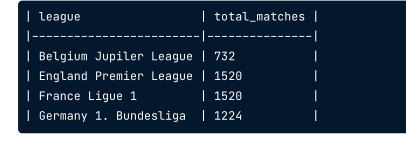



Let's say we want to compare the number of home team wins, away team wins, and ties in the 2013/2014 season. The "Match" table has two relevant columns -- home_goal, and away_goal.

```
SELECT
date,
id,
home_goal,
away_goal
FROM match
WHERE season = '2013/2014';
```

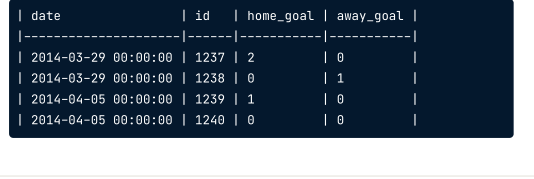


We can potentially add filters to the WHERE clause selecting wins, loses, and ties as separate queries, but that's not very efficient if you want to compare these separate outcomes in a single data set.

```
SELECT
date,
id,
home_goal,
away_goal
FROM match
WHERE season = '2013/2014'
AND home_team_goal > away_team_goal;
```
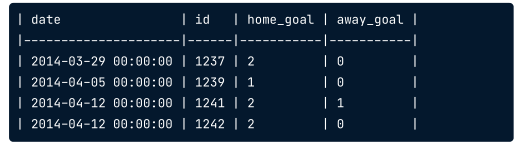


####CASE statements
This is where the CASE statement comes in. Case statements are SQL's version of an "IF this THEN that" statement. Case statements have three parts -- a WHEN clause, a THEN clause, and an ELSE clause. The first part -- the WHEN clause -- tests a given condition, say, x = 1. If this condition is TRUE, it returns the item you specify after your THEN clause. You can create multiple conditions by listing WHEN and THEN statements within the same CASE statement. The CASE statement is then ended with an ELSE clause that returns a specified value if all of your when statements are not true. When you have completed your statement, be sure to include the term END and give it an alias. The completed CASE statement will evaluate to one column in your SQL query.

```
CASE WHEN x = 1 THEN 'a'
WHEN x = 2 THEN 'b'
ELSE 'c' END AS new_column
```

```
SELECT
id,
home_goal,
away_goal,
CASE WHEN home_goal > away_goal THEN 'Home Team Win'
WHEN home_goal < away_goal THEN 'Away Team Win'
ELSE 'Tie' END AS outcome
FROM match
WHERE season = '2013/2014';
```

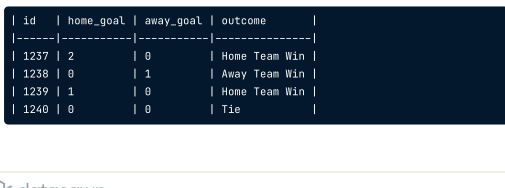

####CASE WHEN
In this example, we use a CASE statement to create a new variable that identifies matches as home team wins, away team wins, or ties. A new column is created with the appropriate text for each match given the outcome.

####Basic CASE statements
What is your favorite team?

The European Soccer Database contains data about 12,800 matches from 11 countries played between 2011-2015! Throughout this course, you will be shown filtered versions of the tables in this database in order to better explore their contents.

In this exercise, you will identify matches played between FC Schalke 04 and FC Bayern Munich. There are 2 teams identified in each match in the hometeam_id and awayteam_id columns, available to you in the filtered matches_germany table. ID can join to the team_api_id column in the teams_germany table, but you cannot perform a join on both at the same time.

However, you can perform this operation using a CASE statement once you've identified the team_api_id associated with each team!

* Select the team's long name and API id from the teams_germany table.
* Filter the query for FC Schalke 04 and FC Bayern Munich using IN, giving you the team_api_IDs needed for the next step.

In [ ]:
SELECT
	-- Select the team long name and team API id
	team_long_name,
	team_api_id
FROM teams_germany
-- Only include FC Schalke 04 and FC Bayern Munich
WHERE team_long_name in ('FC Bayern Munich', 'FC Schalke 04');

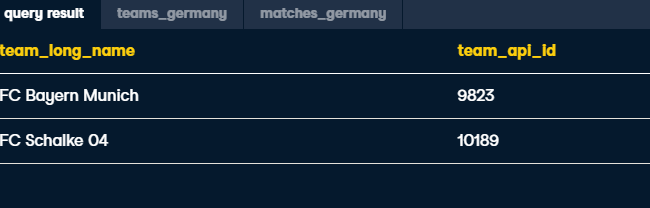

* Create a CASE statement that identifies whether a match in Germany included FC Bayern Munich, FC Schalke 04, or neither as the home team.
* Group the query by the CASE statement alias, home_team.

In [ ]:
-- Identify the home team as Bayern Munich, Schalke 04, or neither
SELECT 
	case when hometeam_id = 10189 then 'FC Schalke 04'
        when hometeam_id = 9823 then 'FC Bayern Munich'
         ELSE 'Other' END AS home_team,
	COUNT(id) AS total_matches
FROM matches_germany
-- Group by the CASE statement alias
GROUP BY home_team;

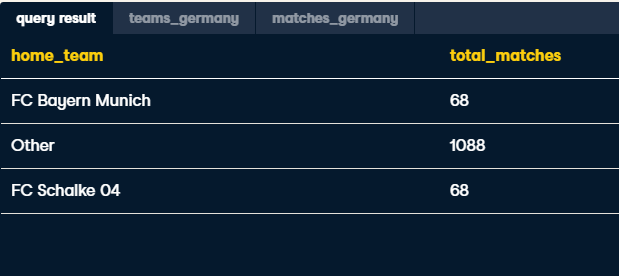

####CASE statements comparing column values
Barcelona is considered one of the strongest teams in Spain's soccer league.

In this exercise, you will be creating a list of matches in the 2011/2012 season where Barcelona was the home team. You will do this using a CASE statement that compares the values of two columns to create a new group -- wins, losses, and ties.

In 3 steps, you will build a query that identifies a match's winner, identifies the identity of the opponent, and finally filters for Barcelona as the home team. Completing a query in this order will allow you to watch your results take shape with each new piece of information.

The matches_spain table currently contains Barcelona's matches from the 2011/2012 season, and has two key columns, hometeam_id and awayteam_id, that can be joined with the teams_spain table. However, you can only join teams_spain to one column at a time.

* Select the date of the match and create a CASE statement to identify matches as home wins, home losses, or ties.

In [ ]:
SELECT 
	-- Select the date of the match
	date,
	-- Identify home wins, losses, or ties
	case when home_goal > away_goal then 'Home win!'
        when home_goal < away_goal then 'Home loss :(' 
        else 'Tie' end as outcome
FROM matches_spain;

* Left join the teams_spain table team_api_id column to the matches_spain table awayteam_id. This allows us to retrieve the away team's identity.
* Select team_long_name from teams_spain as opponent and complete the CASE statement from Step 1.

In [ ]:
SELECT 
	m.date,
	--Select the team long name column and call it 'opponent'
	t.team_long_name AS opponent, 
	-- Complete the CASE statement with an alias
	case when m.home_goal > m.away_goal then 'Home win!'
        when m.home_goal < m.away_goal then 'Home loss :('
        else 'Tie' end as outcome
FROM matches_spain AS m
-- Left join teams_spain onto matches_spain
left join teams_spain AS t
on m.awayteam_id = t.team_api_id;

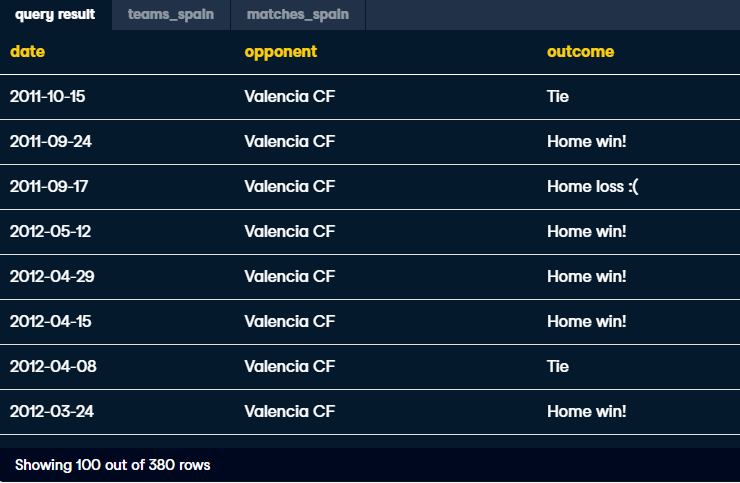

* Complete the same CASE statement as the previous steps.
* Filter for matches where the home team is FC Barcelona (id = 8634).

In [ ]:
SELECT 
	m.date,
	t.team_long_name AS opponent,
    -- Complete the CASE statement with an alias
	case when m.home_goal > m.away_goal then 'Barcelona win!'
        when m.home_goal < m.away_goal then 'Barcelona loss :(' 
        else 'Tie' end as outcome 
FROM matches_spain AS m
LEFT JOIN teams_spain AS t 
ON m.awayteam_id = t.team_api_id
-- Filter for Barcelona as the home team
WHERE m.hometeam_id = 8634; 

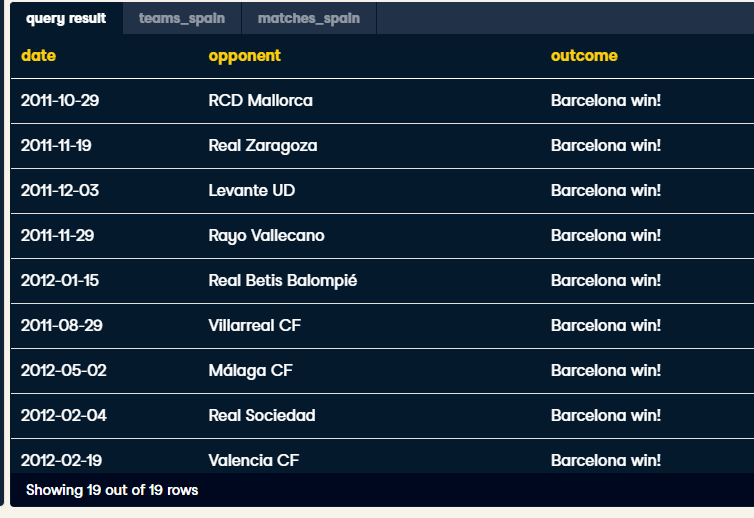

CASE statements comparing two column values part 2
Similar to the previous exercise, you will construct a query to determine the outcome of Barcelona's matches where they played as the away team. You will learn how to combine these two queries in chapters 2 and 3.

Did their performance differ from the matches where they were the home team?

* Complete the CASE statement to identify Barcelona's away team games (id = 8634) as wins, losses, or ties.
* Left join the teams_spain table team_api_id column on the matches_spain table hometeam_id column. This retrieves the identity of the home team opponent.
* Filter the query to only include matches where Barcelona was the away team.

In [ ]:
-- Select matches where Barcelona was the away team
SELECT  
	m.date,
	t.team_long_name AS opponent,
	case when  m.home_goal < m.away_goal then 'Barcelona win!'
        WHEN m.home_goal > m.away_goal then 'Barcelona loss :(' 
        else 'Tie' end as outcome
FROM matches_spain AS m
-- Join teams_spain to matches_spain
LEFT JOIN teams_spain AS t 
ON m.hometeam_id = t.team_api_id
WHERE m.awayteam_id	 = 8634;

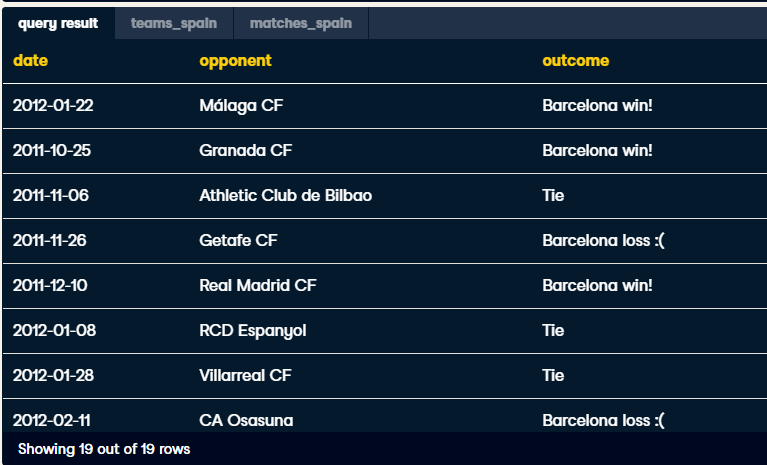

###In CASE things get more complex

CASE WHEN ... AND then some
If you want to test multiple logical conditions in a CASE statement, you can use AND inside your WHEN clause. For example, let's see if each match was played, and won, by the team Chelsea. Let's see the CASE statement in this query. Each WHEN clause contains two logical tests -- the first tests if a hometead_id identifies Chelsea, AND then it tests if the home team scored higher than the away team. If both conditions are TRUE, the new column output returns the phrase "Chelsea home win!". The opposite set of conditions are included in a second when statement -- if the awayteam_id belongs to Chelsea, AND scored higher, then the output returns "Chelsea away win!". All other matches are categorized as a loss or tie. Here's the resulting table.

```
SELECT date, hometeam_id, awayteam_id,
CASE WHEN hometeam_id = 8455 AND home_goal > away_goal
THEN 'Chelsea home win!'
WHEN awayteam_id = 8455 AND home_goal < away_goal
THEN 'Chelsea away win!'
ELSE 'Loss or tie :(' END AS outcome
FROM match
WHERE hometeam_id = 8455 OR awayteam_id = 8455;
```
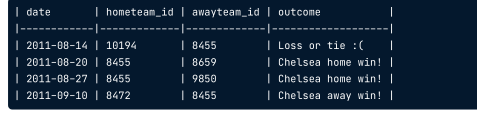


###What ELSE is being excluded?
When testing logical conditions, it's important to carefully consider which rows of your data are part of your ELSE clause, and if they're categorized correctly. Here's the same CASE statement from the previous slide, but the WHERE filter has been removed. Without this filter, your ELSE clause will categorize ALL matches played by anyone, who don't meet these first two conditions, as "Loss or tie :(". Here are the results of this query. A quick look at it shows that the first few matches are all categorized as "Loss or tie", but neither the hometeam_id or awayteam_id belong to Chelsea.

```
SELECT date, hometeam_id, awayteam_id,
CASE WHEN hometeam_id = 8455 AND home_goal > away_goal
THEN 'Chelsea home win!'
WHEN awayteam_id = 8455 AND home_goal < away_goal
THEN 'Chelsea away win!'
ELSE 'Loss or tie :(' END AS outcome
FROM match;
```

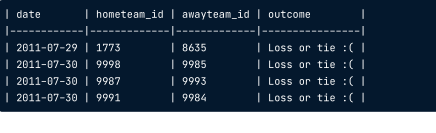

###Correctly categorize your data with CASE
The easiest way to correct for this is to ensure you add specific filters in the WHERE clause that exclude all teams where Chelsea did not play. Here, we specify this by using an OR statement in WHERE, which retrieves only results where the id 8455 is present in the hometeam_id or awayteam_id columns. The resulting table from earlier, with the team IDs in bold here, clearly specifies whether Chelsea was home or away team.

```
SELECT date, hometeam_id, awayteam_id,
CASE WHEN hometeam_id = 8455 AND home_goal > away_goal
THEN 'Chelsea home win!'
WHEN awayteam_id = 8455 AND home_goal < away_goal
THEN 'Chelsea away win!'
ELSE 'Loss or tie :(' END AS outcome
FROM match
WHERE hometeam_id = 8455 OR awayteam_id = 8455;
```

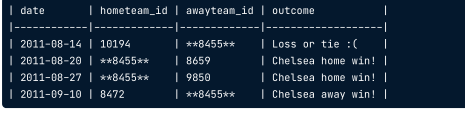

###What's NULL?
It's also important to consider what your ELSE clause is doing. These two queries here are identical, except for the ELSE NULL statement specified in the second. They both return identical results -- a table with quite a few null results. But what if you want to exclude them?

```
SELECT date,
CASE WHEN date > '2015-01-01' THEN 'More Recently'
WHEN date < '2012-01-01' THEN 'Older'
END AS date_category
FROM match;
SELECT date,
CASE WHEN date > '2015-01-01' THEN 'More Recently'
WHEN date < '2012-01-01' THEN 'Older'
ELSE NULL END AS date_category
FROM match;
```

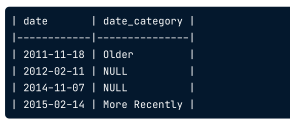

### What are your NULL values doing?
Let's say we're only interested in viewing the results of games where Chelsea won, and we don't care if they lose or tie. Just like in the previous example, simply removing the ELSE clause will still retrieve those results -- and a lot of NULL values.

```
SELECT date, season,
CASE WHEN hometeam_id = 8455 AND home_goal > away_goal
THEN 'Chelsea home win!'
WHEN awayteam_id = 8455 AND home_goal < away_goal
THEN 'Chelsea away win!'
END AS outcome
FROM match
WHERE hometeam_id = 8455 OR awayteam_id = 8455;
```

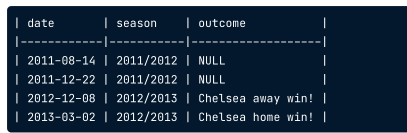

###Where to place your CASE?
To correct for this, you can treat the entire CASE statement as a column to filter by in your WHERE clause, just like any other column. In order to filter a query by a CASE statement,

```
SELECT date, season,
CASE WHEN hometeam_id = 8455 AND home_goal > away_goal
THEN 'Chelsea home win!'
WHEN awayteam_id = 8455 AND home_goal < away_goal
THEN 'Chelsea away win!' END AS outcome
FROM match;
```

you include the entire CASE statement, except its alias, in WHERE. You then specify what you want to include, or exclude. For this query, I want to keep all rows where this CASE statement IS NOT NULL. My resulting table now only includes Chelsea's home and away wins -- and I don't need to filter by their team ID anymore!

```
SELECT date, season,
CASE WHEN hometeam_id = 8455 AND home_goal > away_goal
THEN 'Chelsea home win!'
WHEN awayteam_id = 8455 AND home_goal < away_goal
THEN 'Chelsea away win!' END AS outcome
FROM match
WHERE CASE WHEN hometeam_id = 8455 AND home_goal > away_goal
THEN 'Chelsea home win!'
WHEN awayteam_id = 8455 AND home_goal < away_goal
THEN 'Chelsea away win!' END IS NOT NULL;
```

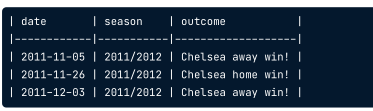

####In CASE of rivalry
Barcelona and Real Madrid have been rival teams for more than 80 years. Matches between these two teams are given the name El Clásico (The Classic). In this exercise, you will query a list of matches played between these two rivals.

You will notice in Step 2 that when you have multiple logical conditions in a CASE statement, you may quickly end up with a large number of WHEN clauses to logically test every outcome you are interested in. It's important to make sure you don't accidentally exclude key information in your ELSE clause.

In this exercise, you will retrieve information about matches played between Barcelona (id = 8634) and Real Madrid (id = 8633). Note that the query you are provided with already identifies the Clásico matches using a filter in the WHERE clause.

* Complete the first CASE statement, identifying Barcelona or Real Madrid as the home team using the hometeam_id column.
* Complete the second CASE statement in the same way, using awayteam_id.

In [ ]:
SELECT 
	date,
	-- Identify the home team as Barcelona or Real Madrid
	case when hometeam_id = 8634 then 'FC Barcelona' 
        else 'Real Madrid CF' end as home,
    -- Identify the away team as Barcelona or Real Madrid
	case when awayteam_id = 8634 then 'FC Barcelona' 
        else 'Real Madrid CF' end as away
FROM matches_spain
WHERE (awayteam_id = 8634 OR hometeam_id = 8634)
      AND (awayteam_id = 8633 OR hometeam_id = 8633);

* Construct the final CASE statement identifying who won each match. Note there are 3 possible outcomes, but 5 conditions that you need to identify.
* Fill in the logical operators to identify Barcelona or Real Madrid as the winner.

In [ ]:
SELECT 
	date,
	CASE WHEN hometeam_id = 8634 THEN 'FC Barcelona' 
         ELSE 'Real Madrid CF' END as home,
	CASE WHEN awayteam_id = 8634 THEN 'FC Barcelona' 
         ELSE 'Real Madrid CF' END as away,
	-- Identify all possible match outcomes
	case when home_goal > away_goal and hometeam_id = 8634 then 'Barcelona win!'
        WHEN home_goal > away_goal and hometeam_id = 8633 then 'Real Madrid win!'
        WHEN home_goal < away_goal and awayteam_id = 8634 then 'Barcelona win!'
        WHEN home_goal < away_goal and awayteam_id = 8633 then 'Real Madrid win!'
        else 'Tie!' end as outcome
FROM matches_spain
WHERE (awayteam_id = 8634 OR hometeam_id = 8634)
      AND (awayteam_id = 8633 OR hometeam_id = 8633);

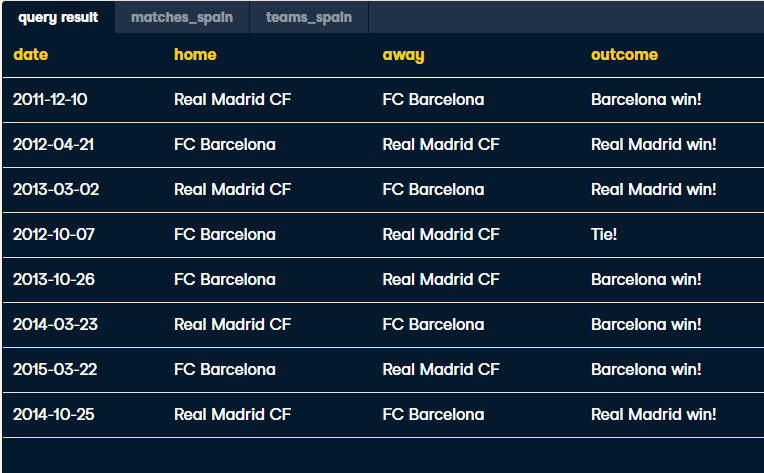

####Filtering your CASE statement
Let's generate a list of matches won by Italy's Bologna team! There are quite a few additional teams in the two tables, so a key part of generating a usable query will be using your CASE statement as a filter in the WHERE clause.

CASE statements allow you to categorize data that you're interested in -- and exclude data you're not interested in. In order to do this, you can use a CASE statement as a filter in the WHERE statement to remove output you don't want to see.

Here is how you might set that up:

```
SELECT *
FROM table
WHERE 
    CASE WHEN a > 5 THEN 'Keep'
         WHEN a <= 5 THEN 'Exclude' END = 'Keep';
```

In essence, you can use the CASE statement as a filtering column like any other column in your database. The only difference is that you don't alias the statement in WHERE.

* Identify Bologna's team ID listed in the teams_italy table by selecting the team_long_name and team_api_id.



In [ ]:
-- Select team_long_name and team_api_id from team
SELECT
	team_long_name,
	team_api_id
FROM teams_italy
-- Filter for team long name
WHERE team_long_name = 'Bologna';

* Select the season and date that a match was played.
* Complete the CASE statement so that only Bologna's home and away wins are identified.

In [ ]:
-- Select the season and date columns
SELECT 
	season,
	date,
    -- Identify when Bologna won a match
	case when hometeam_id = 9857 
        and home_goal > away_goal 
        then 'Bologna Win'
		when awayteam_id = 9857 
        and away_goal > home_goal 
        then 'Bologna Win' 
		end AS outcome
FROM matches_italy;

* Select the home_goal and away_goal for each match.
* Use the CASE statement in the WHERE clause to filter all NULL values generated by the statement in the previous step.

In [ ]:
-- Select the season, date, home_goal, and away_goal columns
SELECT 
	season,
    date,
	home_goal,
	away_goal
FROM matches_italy
WHERE 
-- Exclude games not won by Bologna
	case when hometeam_id = 9857 and home_goal > away_goal then 'Bologna Win'
		when awayteam_id = 9857 and away_goal > home_goal then 'Bologna Win' 
		end IS NOT null;

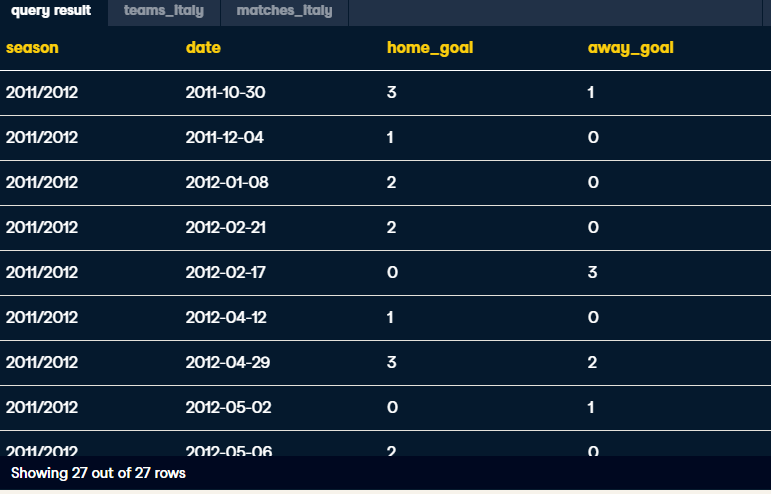

##CASE WHEN with aggregate functions

COUNTing CASES
Let's say you wanted to prepare a summary table counting the number of home and away games that Liverpool won in each season. If you've created summary tables in Spreadsheets, you can probably visualize the final table, here -- but how do you get a count of Liverpool's wins in each season?

###CASE WHEN with COUNT
You guessed it -- a CASE statement. CASE statements are like any other column in your query, so you can include them inside an aggregate function. Take a look at the CASE statement. The WHEN clause includes a similar logical test to the previous lesson -- did Liverpool play as the home team, AND did the home team score higher than the away team? The difference begins in your THEN clause. Instead of returning a string of text, you return the column identifying the unique match id. When this CASE statement is inside the COUNT function, it COUNTS every id returned by this CASE statement.


```
SELECT
season,
COUNT(CASE WHEN hometeam_id = 8650
AND home_goal > away_goal
THEN id END) AS home_wins
FROM match
GROUP BY season;
```

You then add a second CASE statement for the away team, and group the query by the season. When counting information in a CASE statement, you can return anything you'd like --

```
SELECT
season,
COUNT(CASE WHEN hometeam_id = 8650 AND home_goal > away_goal
THEN id END) AS home_wins,
COUNT(CASE WHEN awayteam_id = 8650 AND away_goal > home_goal
THEN id END) AS away_wins
FROM match
GROUP BY season;
```

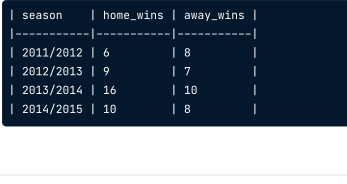

a number, a string of text, or any column in the table, SQL is COUNTing the number of rows returned by the CASE statement.

```
SELECT
season,
COUNT(CASE WHEN hometeam_id = 8650 AND home_goal > away_goal
THEN 54321 END) AS home_wins,
COUNT(CASE WHEN awayteam_id = 8650 AND away_goal > home_goal
THEN 'Some random text' END) AS away_wins
FROM match
GROUP BY season;
```
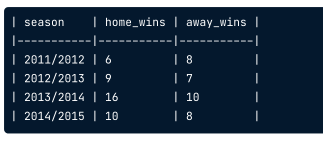


###CASE WHEN with SUM
Similarly, you can use the SUM function to calculate a total of any value. Let's say we're interested in the number of home and away goals that Liverpool scored in each season. This is fairly simple to set up -- if the hometeam_id is Liverpool's, return the home_goal value. The ELSE condition is assumed to be NULL, so the query returns the total home_goals scored by Liverpool in each season.

```
SELECT
season,
SUM(CASE WHEN hometeam_id = 8650
THEN home_goal END) AS home_goals,
SUM(CASE WHEN awayteam_id = 8650
THEN away_goal END) AS away_goals
FROM match
GROUP BY season;
```

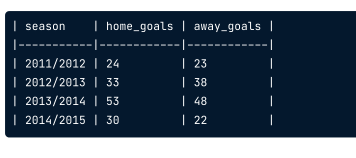

###The CASE is fairly AVG...
You can also use the AVG function with CASE in two key ways. First, you can calculate an average of data. You can do this using CASE in the EXACT same way you used the SUM function. Just change out SUM for AVG in this query, and you instead get the AVG goals Liverpool scored in each season.

```
SELECT
season,
AVG(CASE WHEN hometeam_id = 8650
THEN home_goal END) AS home_goals,
AVG(CASE WHEN awayteam_id = 8650
THEN away_goal END) AS away_goals
FROM match
GROUP BY season;
```

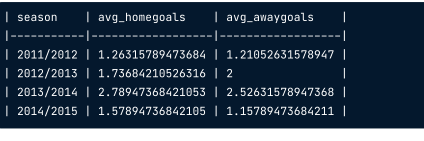

###A ROUNDed AVG
You can make the results easier to read using ROUND. ROUND takes 2 arguments -- a numerical value, and the number of decimal points to round the value to.

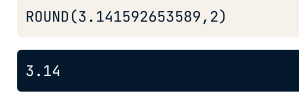

###A ROUNDed AVG
Place it outside your aggregate CASE statement, and include the number of decimal points at the end. There, that's much easier to read!

```
SELECT
season,
ROUND(AVG(CASE WHEN hometeam_id = 8650
THEN home_goal END),2) AS home_goals,
ROUND(AVG(CASE WHEN awayteam_id = 8650
THEN away_goal END),2) AS away_goals
FROM match
GROUP BY season;
```

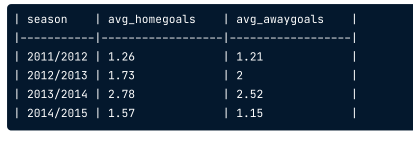

###Percentages with CASE and AVG
The second key application of CASE with AVG is in the calculation of percentages. This requires a specific structure in order for your calculation to be accurate. The question we're answering here is, "What percentage of Liverpool's games did they win in each season?" The first component of this CASE statement is a WHEN clause identifying what you're calculating a percentage of -- in this case, how many games did they win? This is tested in the same way as previous slides, and your THEN clause returns a 1. The second component identifies Liverpool's games that they LOST, and returns the value 0. All other matches -- ties, games not involving Liverpool -- are excluded as NULLs. Here are the results of this query ...

```
SELECT
season,
AVG(CASE WHEN hometeam_id = 8455 AND home_goal > away_goal THEN 1
WHEN hometeam_id = 8455 AND home_goal < away_goal THEN 0
END) AS pct_homewins,
AVG(CASE WHEN awayteam_id = 8455 AND away_goal > home_goal THEN 1
WHEN awayteam_id = 8455 AND away_goal < home_goal THEN 0
END) AS pct_awaywins
FROM match
GROUP BY season;
```

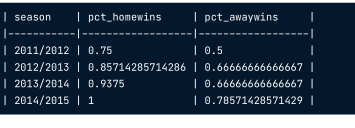

... and here's the ROUNDed, more readable version of the results.

```
SELECT
season,
ROUND(AVG(CASE WHEN hometeam_id = 8455 AND home_goal > away_goal THEN 1
WHEN hometeam_id = 8455 AND home_goal < away_goal THEN 0
END),2) AS pct_homewins,
ROUND(AVG(CASE WHEN awayteam_id = 8455 AND away_goal > home_goal THEN 1
WHEN awayteam_id = 8455 AND away_goal < home_goal THEN 0
END),2) AS pct_awaywins
FROM match
GROUP BY season;
```

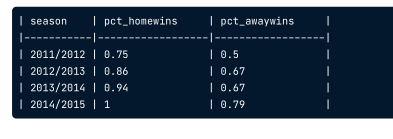

####COUNT using CASE WHEN
Do the number of soccer matches played in a given European country differ across seasons? We will use the European Soccer Database to answer this question.

You will examine the number of matches played in 3 seasons within each country listed in the database. This is much easier to explore with each season's matches in separate columns. Using the country and unfiltered match table, you will count the number of matches played in each country during the 2012/2013, 2013/2014, and 2014/2015 match seasons.

* Create a CASE statement that identifies the id of matches played in the 2012/2013 season. Specify that you want ELSE values to be NULL.
* Wrap the CASE statement in a COUNT function and group the query by the country alias.

In [ ]:
SELECT 
	c.name AS country,
    -- Count games from the 2012/2013 season
	count(case when m.season = '2012/2013' 
        	then m.id ELSE null end) AS matches_2012_2013
FROM country AS c
LEFT JOIN match AS m
ON c.id = m.country_id
-- Group by country name alias
group by country;

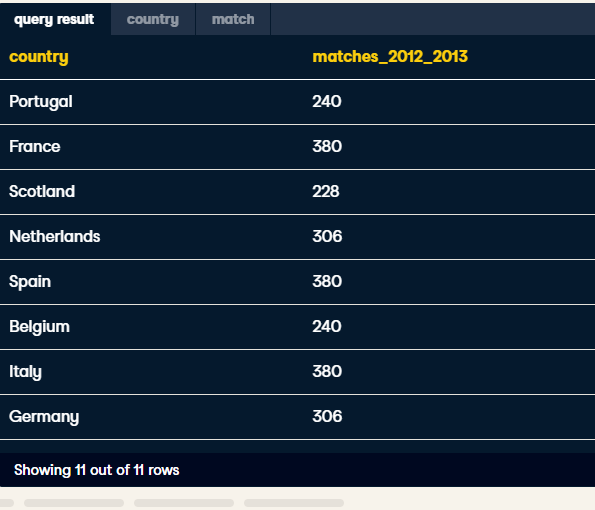

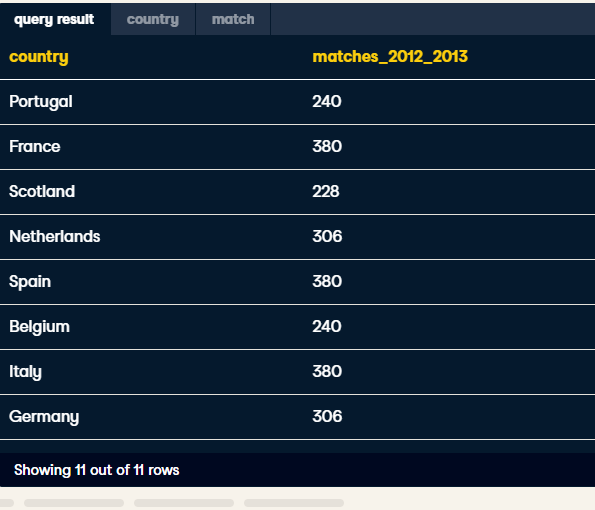

* Create 3 CASE WHEN statements counting the matches played in each country across the 3 seasons.
* END your CASE statement without an ELSE clause.

In [ ]:
SELECT 
	c.name AS country,
    -- Count matches in each of the 3 seasons
	count(case when m.season = '2012/2013' then m.id end) AS matches_2012_2013,
	count(case when m.season = '2013/2014' then m.id end) AS matches_2013_2014,
	count(case when m.season = '2014/2015' then m.id end) AS matches_2014_2015
FROM country AS c
LEFT JOIN match AS m
ON c.id = m.country_id
-- Group by country name alias
group by country;

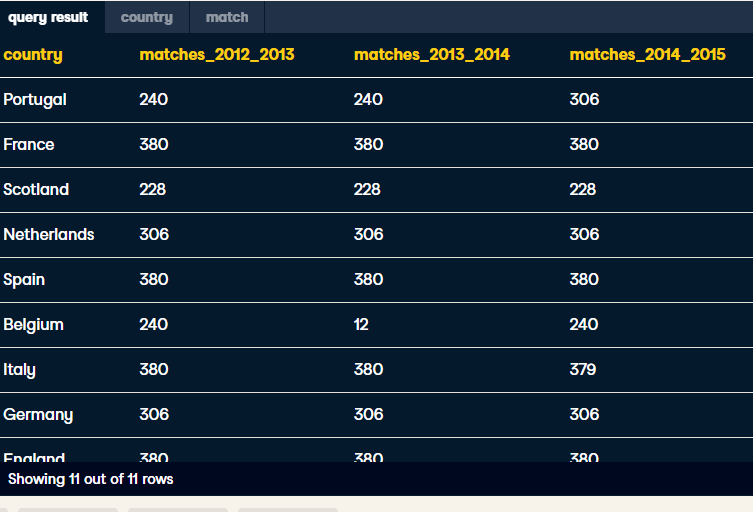

####COUNT and CASE WHEN with multiple conditions
In R or Python, you have the ability to calculate a SUM of logical values (i.e., TRUE/FALSE) directly. In SQL, you have to convert these values into 1 and 0 before calculating a sum. This can be done using a CASE statement.

There's one key difference when using SUM to aggregate logical values compared to using COUNT in the previous exercise --

Your goal here is to use the country and match table to determine the total number of matches won by the home team in each country during the 2012/2013, 2013/2014, and 2014/2015 seasons.

* Create 3 CASE statements to "count" matches in the '2012/2013', '2013/2014', and '2014/2015' seasons, respectively.
* Have each CASE statement return a 1 for every match you want to include, and a 0 for every match to exclude.
* Wrap the CASE statement in a SUM to return the total matches played in each season.
* Group the query by the country name alias.

In [ ]:
SELECT 
	c.name AS country,
    -- Sum the total records in each season where the home team won
	sum(case when m.season = '2012/2013' AND m.home_goal > m.away_goal 
        THEN 1 ELSE 0 end) AS matches_2012_2013,
 	sum(case when m.season = '2013/2014' aND m.home_goal > m.away_goal 
        THEN 1 else 0 end) AS matches_2013_2014,
	sum(case when m.season = '2014/2015' aND m.home_goal > m.away_goal  
        then 1 else 0 end) AS matches_2014_2015
FROM country AS c
LEFT JOIN match AS m
ON c.id = m.country_id
-- Group by country name alias
GROUP BY country;

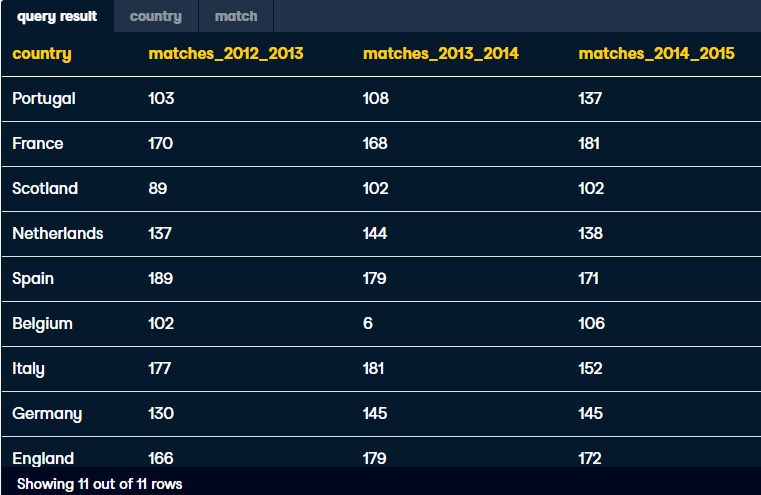

####Calculating percent with CASE and AVG
CASE statements will return any value you specify in your THEN clause. This is an incredibly powerful tool for robust calculations and data manipulation when used in conjunction with an aggregate statement. One key task you can perform is using CASE inside an AVG function to calculate a percentage of information in your database.

Here's an example of how you set that up:

```
AVG(CASE WHEN condition_is_met THEN 1
         WHEN condition_is_not_met THEN 0 END)
```

With this approach, it's important to accurately specify which records count as 0, otherwise your calculations may not be correct!

Your task is to examine the number of wins, losses, and ties in each country. The matches table is filtered to include all matches from the 2013/2014 and 2014/2015 seasons.

* Create 3 CASE statements to COUNT the total number of home team wins, away team wins, and ties, which will allow you to examine the total number of records.


In [ ]:
SELECT 
    c.name AS country,
    -- Count the home wins, away wins, and ties in each country
	count(case when m.home_goal > m.away_goal THEN m.id 
        END) AS home_wins,
	count(case when m.home_goal < m.away_goal THEN m.id 
        END) AS away_wins,
	count(case when m.home_goal = m.away_goal THEN m.id 
        END) AS ties
FROM country AS c
LEFT JOIN matches AS m
ON c.id = m.country_id
GROUP BY country;

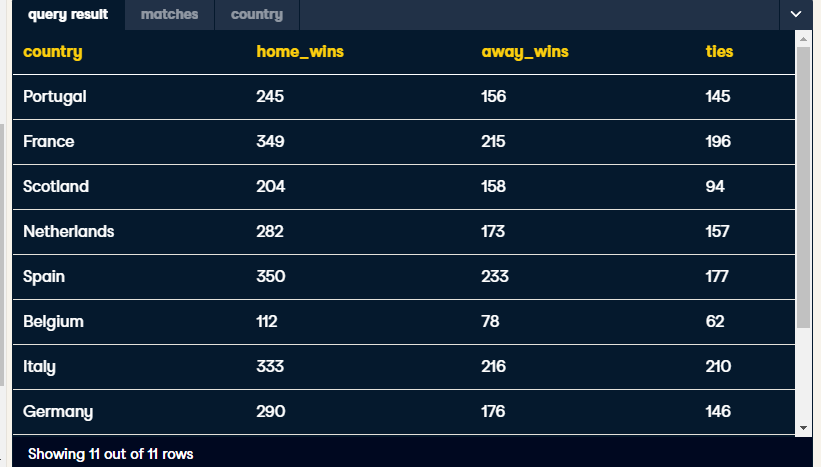

* Calculate the percentage of matches tied using a CASE statement inside AVG.
* Fill in the logical operators for each statement. Alias your columns as ties_2013_2014 and ties_2014_2015, respectively.

In [ ]:
SELECT 
	c.name AS country,
    -- Calculate the percentage of tied games in each season
	avg(case when m.season='2013/2014' AND m.home_goal = m.away_goal THEN 1
			WHEN m.season='2013/2014' AND m.home_goal != m.away_goal THEN 0
			END) AS ties_2013_2014,
	avg(case when m.season='2014/2015' AND m.home_goal = m.away_goal THEN 1
			WHEN m.season='2014/2015' AND m.home_goal != m.away_goal THEN 0 end) AS ties_2014_2015
FROM country AS c
LEFT JOIN matches AS m
ON c.id = m.country_id
GROUP BY country;

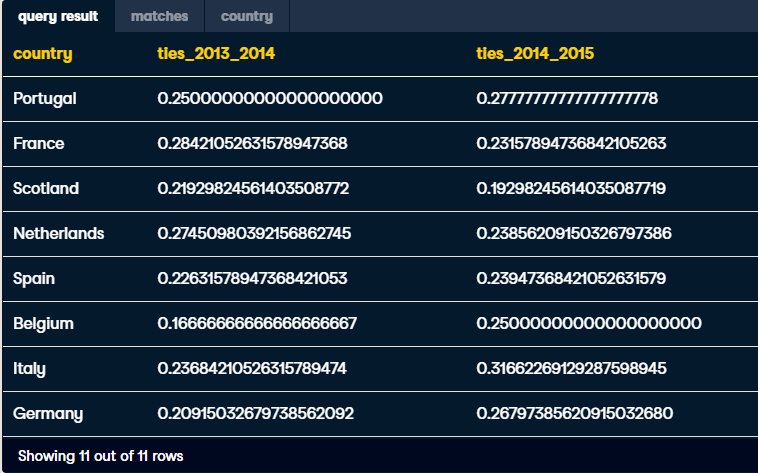

* The previous "ties" columns returned values with 14 decimal points, which is not easy to interpret. Use the ROUND function to round to 2 decimal points.

In [ ]:
SELECT 
	c.name AS country,
    -- Round the percentage of tied games to 2 decimal points
	round(avg(CASE WHEN m.season='2013/2014' AND m.home_goal = m.away_goal THEN 1
			 WHEN m.season='2013/2014' AND m.home_goal != m.away_goal THEN 0
			 END),2) AS pct_ties_2013_2014,
	round(avg(CASE WHEN m.season='2014/2015' AND m.home_goal = m.away_goal THEN 1
			 WHEN m.season='2014/2015' AND m.home_goal != m.away_goal THEN 0
			 END),2) AS pct_ties_2014_2015
FROM country AS c
LEFT JOIN matches AS m
ON c.id = m.country_id
GROUP BY country;

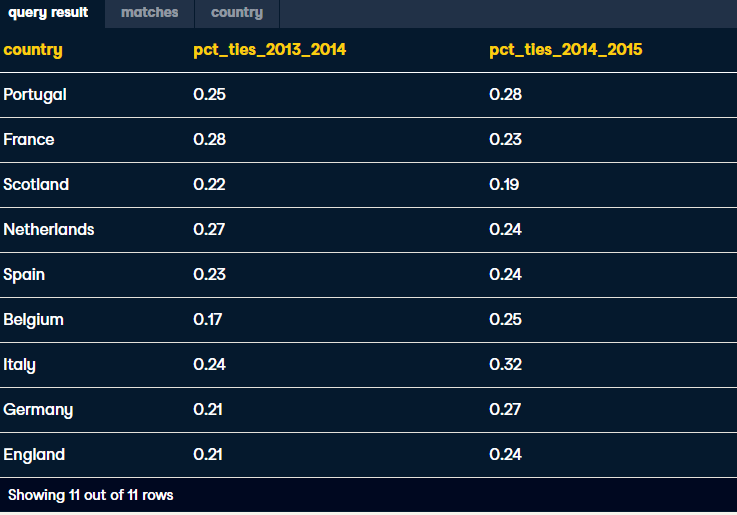

##WHERE are the Subqueries?

> A subquery is a query nested inside another query. You can tell that there is a subquery in your SQL statement if you have an additional SELECT statement contained inside parentheses, surrounded by another complete SQL statement.

Often, in order to retrieve information you want, you have to perform some intermediary transformations to your data before selecting, filtering, or calculating information. Subqueries are a common way of performing this transformation.

